In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sampled-and-cleaned-en-and-es-tweets/en_tweets_sampled_clean.csv
/kaggle/input/sampled-and-cleaned-en-and-es-tweets/en_sampled_clean_v2.csv
/kaggle/input/sampled-and-cleaned-en-and-es-tweets/es_tweets_sampled_clean.csv


# Import Libraries and Modules

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

In [4]:
en_data = pd.read_csv("/kaggle/input/sampled-and-cleaned-en-and-es-tweets/en_sampled_clean_v2.csv",
                   encoding='latin-1')
en_data.head()

,Unnamed: 0,class,tweet_id,clean_tweet_nostop_lemma
0,0,CONTROL,1517602273454608385,Ã£Ã¢ I think james cameron direct sequel new z...
1,1,CONTROL,1453089606551982089,6 10 joke well this
2,2,CONTROL,1026936104317014017,fraud abuse spotlight florida north texas
3,3,CONTROL,1521805936670744577,just Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢
4,4,CONTROL,1338565435831115776,just post video san diego california


In [7]:
PALETTE = 'crest'

[Text(0, 0, 'CONTROL'),
 Text(1, 0, 'ADHD'),
 Text(2, 0, 'DEPRESSION'),
 Text(3, 0, 'AUTISM'),
 Text(4, 0, 'BIPOLAR'),
 Text(5, 0, 'ANXIETY'),
 Text(6, 0, 'PTSD'),
 Text(7, 0, 'OCD'),
 Text(8, 0, 'SCHIZOPHRENIA'),
 Text(9, 0, 'EATING DISORDER')]

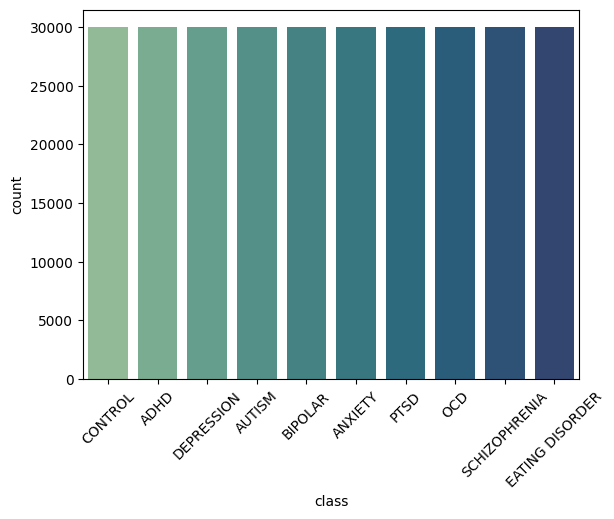

In [8]:
en_plot = sns.countplot(x ='class', data=en_data, palette= PALETTE);
en_plot.set_xticklabels(en_plot.get_xticklabels(), rotation=45)

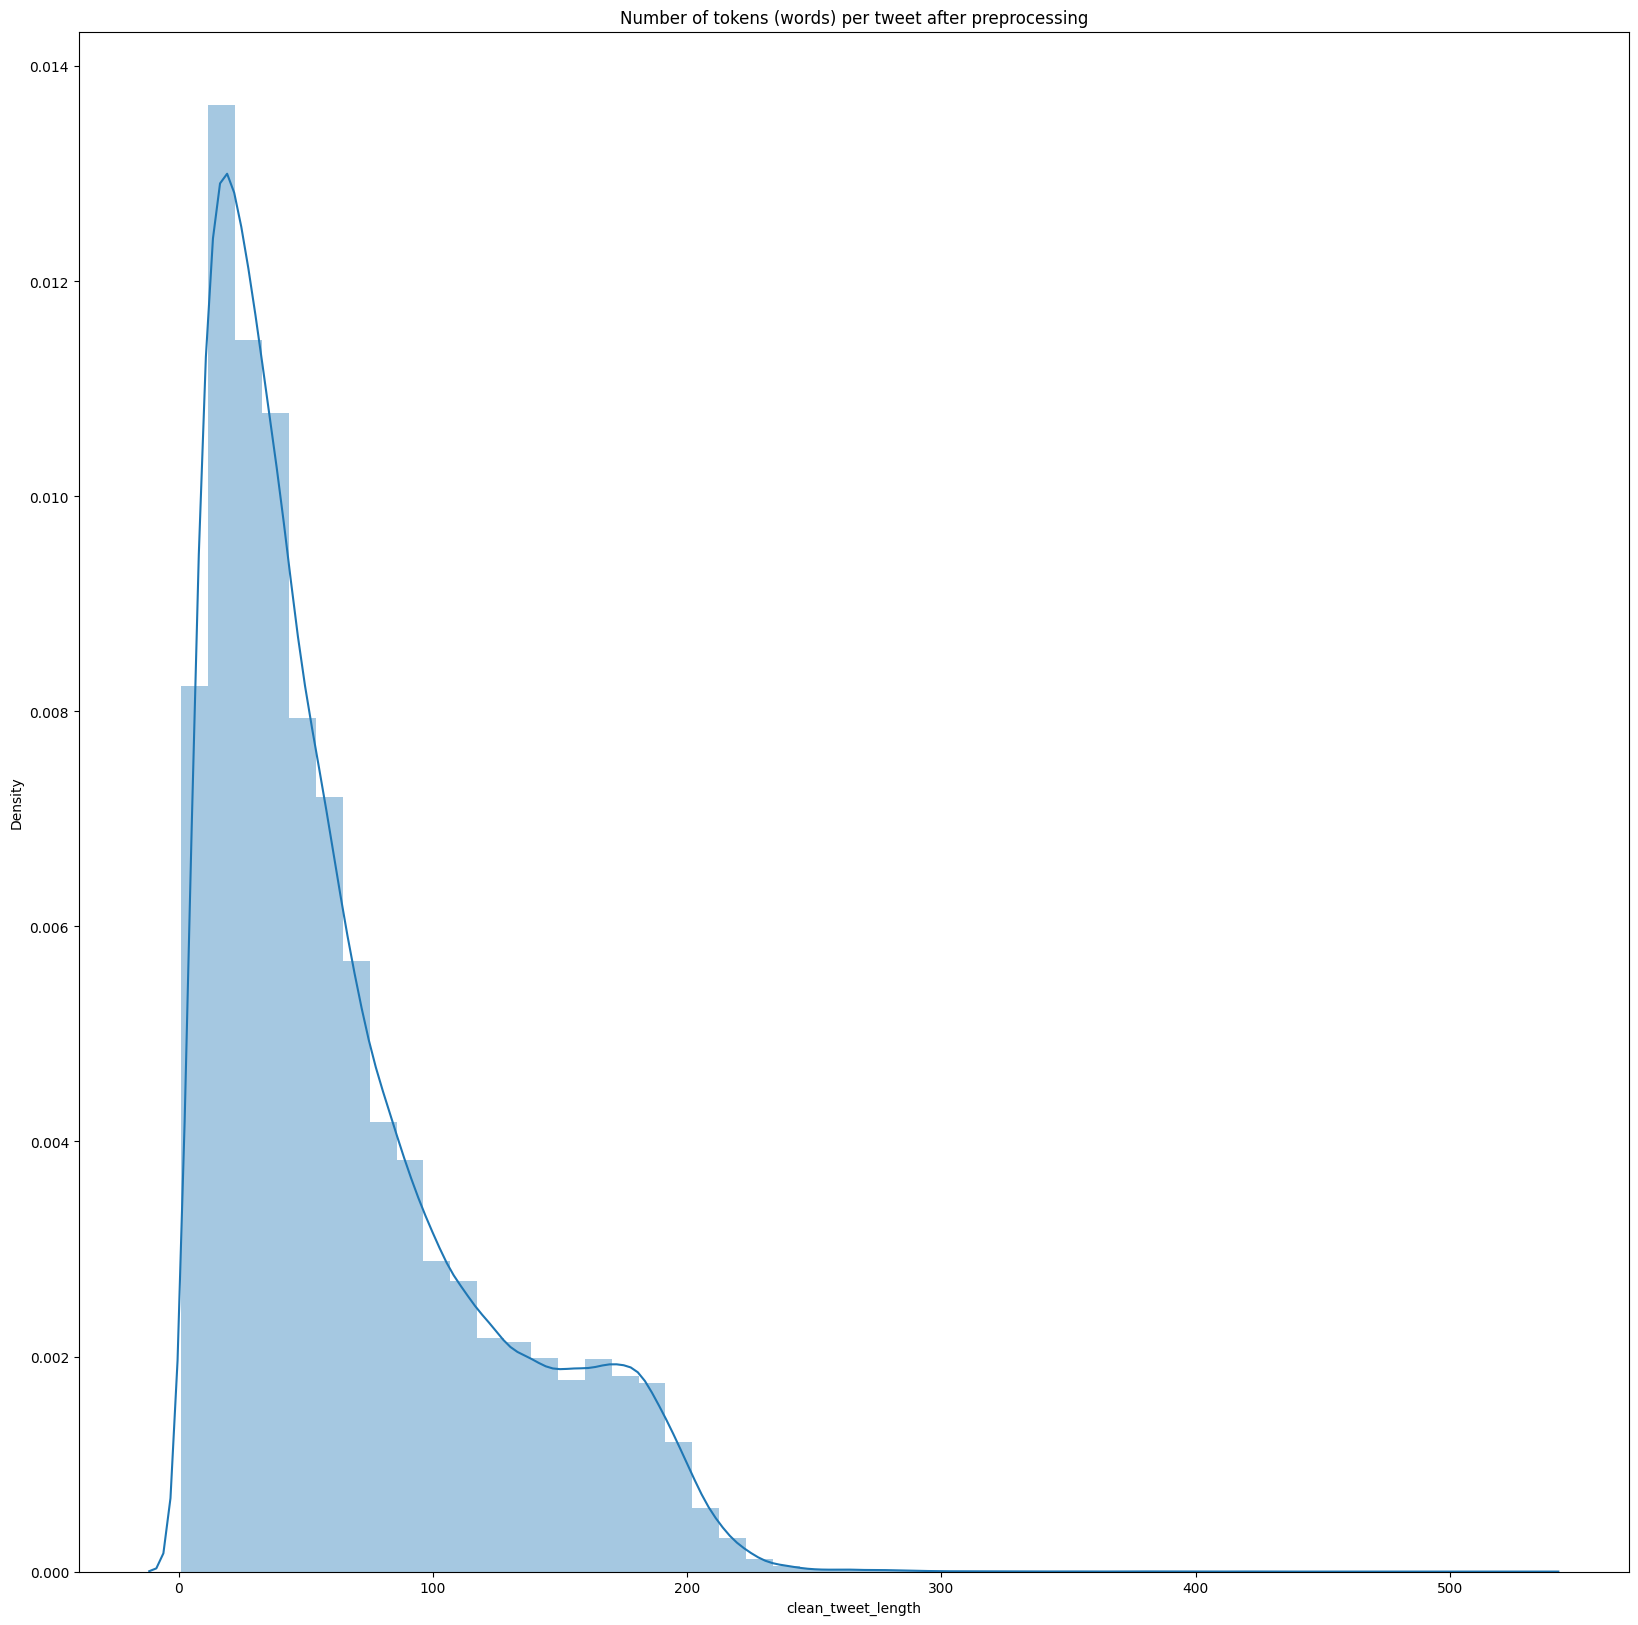

In [10]:
en_data['clean_tweet_length'] = en_data['clean_tweet_nostop_lemma'].str.len()
fig = plt.figure(figsize=(20,20))
sns.distplot(en_data['clean_tweet_length'])
plt.title('Number of tokens (words) per tweet after preprocessing')
plt.show()

In [5]:
es_data = pd.read_csv("/kaggle/input/sampled-and-cleaned-en-and-es-tweets/es_tweets_sampled_clean.csv",
                   encoding='latin-1')
es_data.head()

,Unnamed: 0,class,tweet_id,clean_tweet_nostop_lemma
0,0,CONTROL,1450886781662994436,acuerdo senado marina acciÃ£Ã¢Â³n estratÃ£Ã¢gi...
1,1,CONTROL,1419069713548783617,dalar like duda jajar
2,2,CONTROL,1197880231668965378,Ã£Ã¢Ã¢ Ã¢ Ã£Ã¢ compartir Ã©l llevar dentro ac...
3,3,CONTROL,1295510330701942785,Ã©l bueno Ã©l malo Ã©l freir
4,4,CONTROL,1419787186573086722,bueno Ã©l Ã©l tratar


[Text(0, 0, 'CONTROL'),
 Text(1, 0, 'DEPRESSION'),
 Text(2, 0, 'ANXIETY'),
 Text(3, 0, 'ADHD'),
 Text(4, 0, 'EATING'),
 Text(5, 0, 'ASD'),
 Text(6, 0, 'BIPOLAR'),
 Text(7, 0, 'OCD'),
 Text(8, 0, 'PTSD'),
 Text(9, 0, 'SCHIZOPHRENIA')]

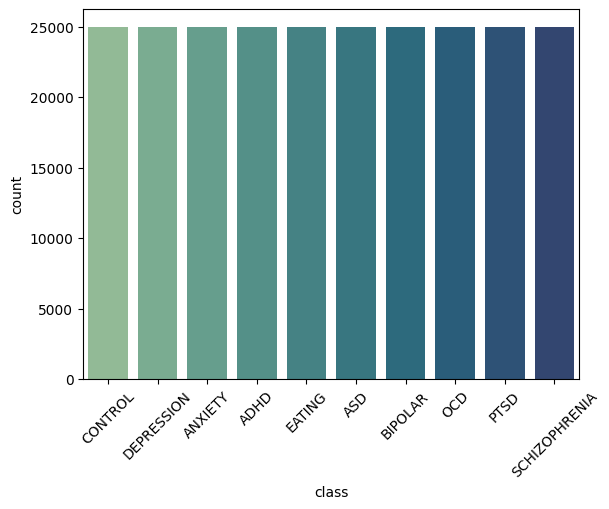

In [9]:
es_plot = sns.countplot(x ='class', data=es_data, palette= PALETTE);
es_plot.set_xticklabels(es_plot.get_xticklabels(), rotation=45)

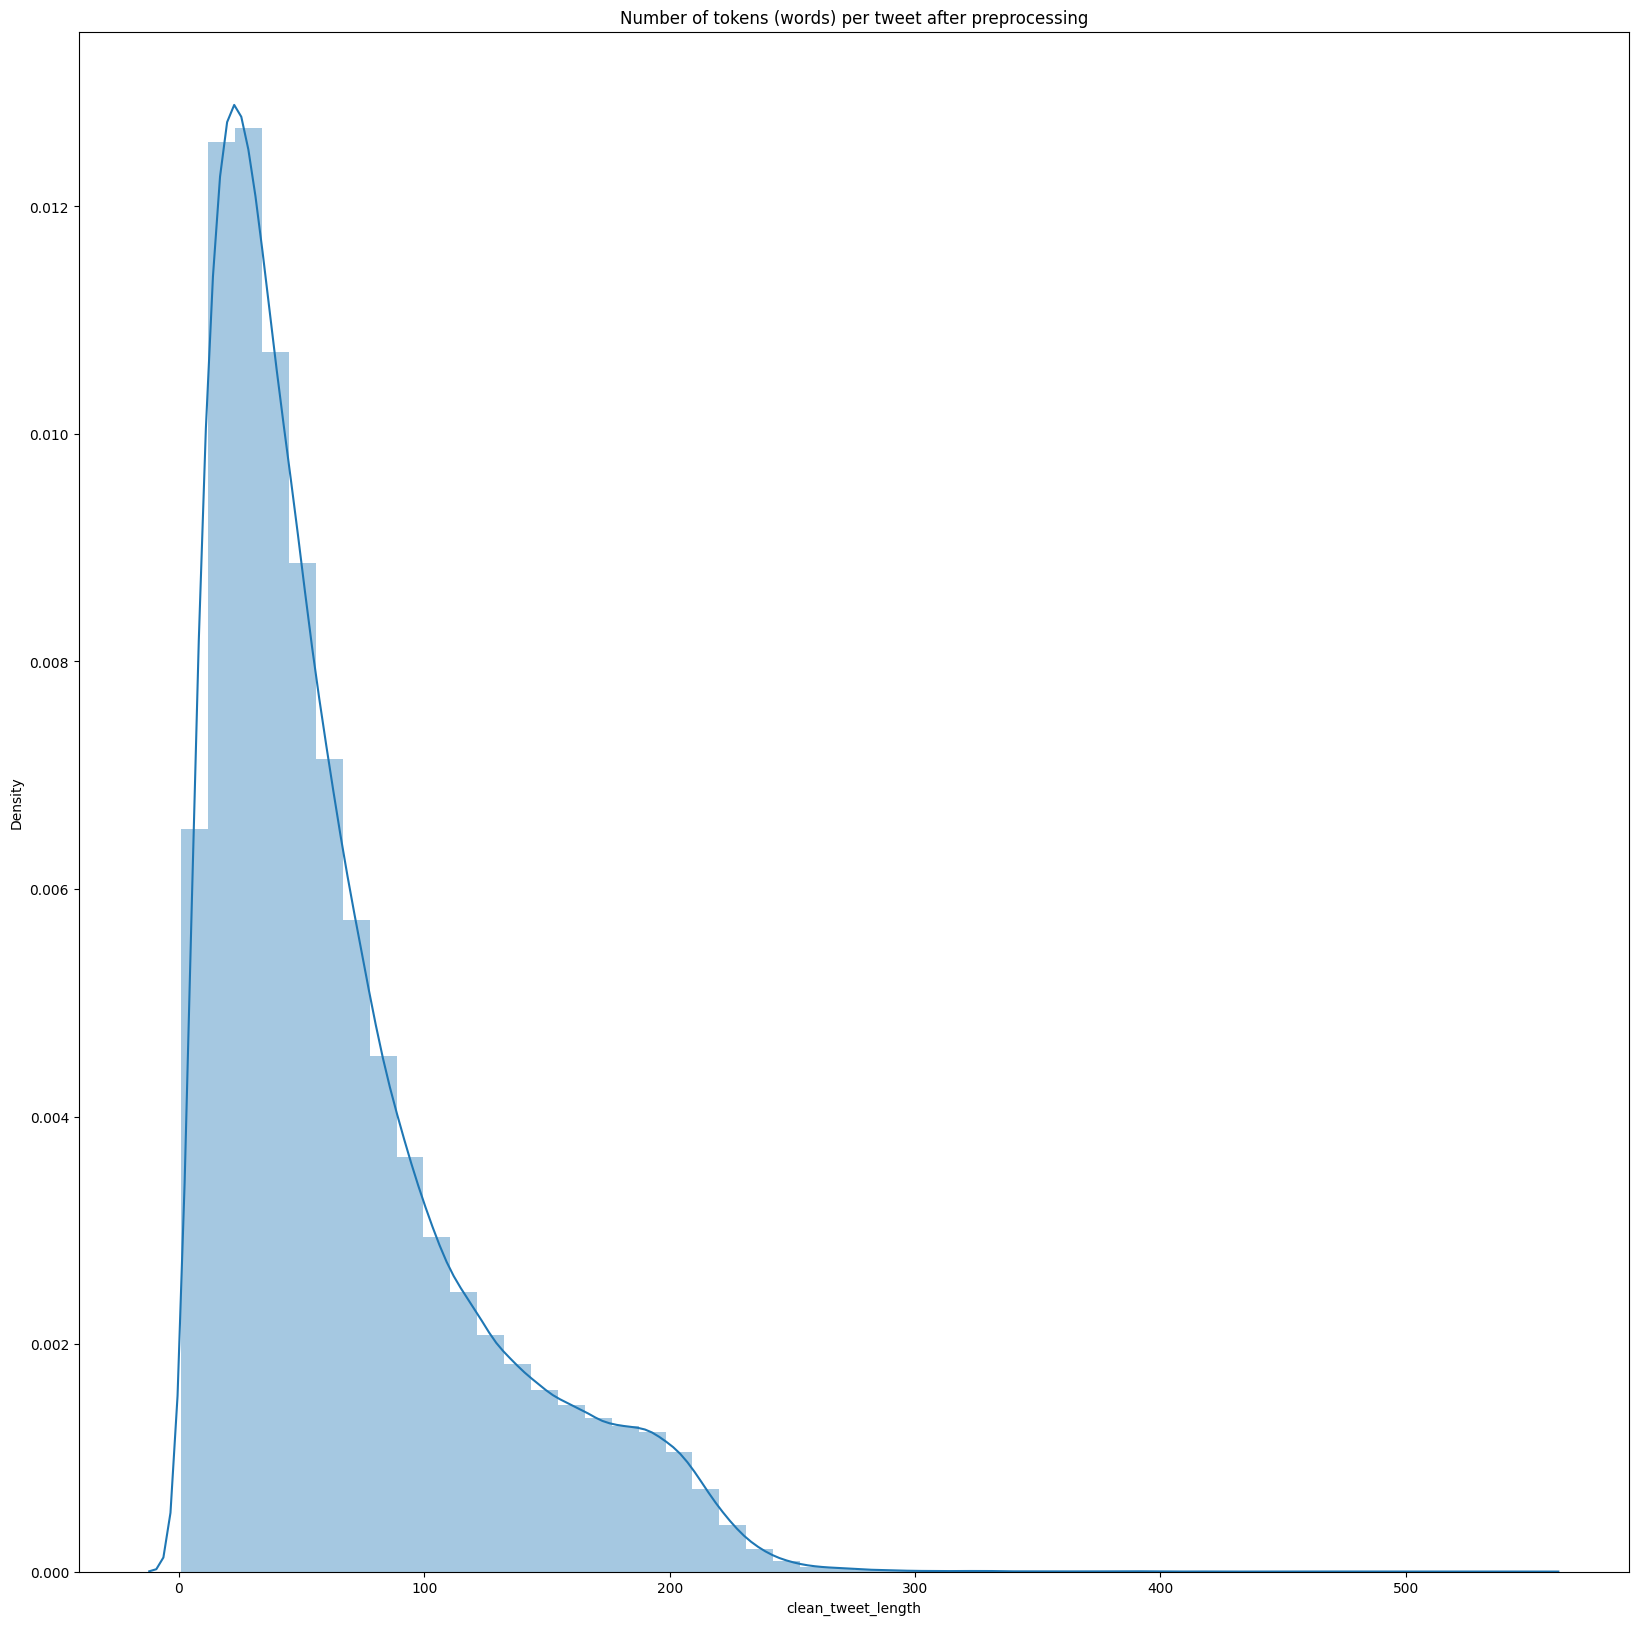

In [11]:
es_data['clean_tweet_length'] = es_data['clean_tweet_nostop_lemma'].str.len()
fig = plt.figure(figsize=(20,20))
sns.distplot(es_data['clean_tweet_length'])
plt.title('Number of tokens (words) per tweet after preprocessing')
plt.show()

In [6]:
es_data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [15]:
es_data.head()

,class,tweet_id,clean_tweet_nostop_lemma,clean_tweet_length
0,CONTROL,1450886781662994436,acuerdo senado marina acciÃ£Ã¢Â³n estratÃ£Ã¢gi...,58.0
1,CONTROL,1419069713548783617,dalar like duda jajar,21.0
2,CONTROL,1197880231668965378,Ã£Ã¢Ã¢ Ã¢ Ã£Ã¢ compartir Ã©l llevar dentro ac...,204.0
3,CONTROL,1295510330701942785,Ã©l bueno Ã©l malo Ã©l freir,31.0
4,CONTROL,1419787186573086722,bueno Ã©l Ã©l tratar,20.0


In [16]:
en_data.head()

,Unnamed: 0,class,tweet_id,clean_tweet_nostop_lemma,clean_tweet_length
0,0,CONTROL,1517602273454608385,Ã£Ã¢ I think james cameron direct sequel new z...,57.0
1,1,CONTROL,1453089606551982089,6 10 joke well this,19.0
2,2,CONTROL,1026936104317014017,fraud abuse spotlight florida north texas,41.0
3,3,CONTROL,1521805936670744577,just Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢,29.0
4,4,CONTROL,1338565435831115776,just post video san diego california,37.0


In [7]:
en_data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [8]:
new_df = pd.concat([en_data, es_data], ignore_index=True)

In [9]:
new_df.head()

,class,tweet_id,clean_tweet_nostop_lemma
0,CONTROL,1517602273454608385,Ã£Ã¢ I think james cameron direct sequel new z...
1,CONTROL,1453089606551982089,6 10 joke well this
2,CONTROL,1026936104317014017,fraud abuse spotlight florida north texas
3,CONTROL,1521805936670744577,just Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢
4,CONTROL,1338565435831115776,just post video san diego california


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   class                     550000 non-null  object 
 1   tweet_id                  550000 non-null  int64  
 2   clean_tweet_nostop_lemma  549056 non-null  object 
 3   clean_tweet_length        549056 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.8+ MB


In [11]:
new_df.dropna(inplace=True)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549056 entries, 0 to 549999
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   class                     549056 non-null  object
 1   tweet_id                  549056 non-null  int64 
 2   clean_tweet_nostop_lemma  549056 non-null  object
dtypes: int64(1), object(2)
memory usage: 16.8+ MB


In [23]:
new_df["class"].unique()

array(['CONTROL', 'ADHD', 'DEPRESSION', 'AUTISM', 'BIPOLAR', 'ANXIETY',
       'PTSD', 'OCD', 'SCHIZOPHRENIA', 'EATING DISORDER', 'EATING', 'ASD'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Step 1: Replace "EATING DISORDER" and "EATING" with the same value
new_df['class'] = new_df['class'].replace(['EATING DISORDER', 'EATING'], 'EATING DISORDER')

# Step 2: Encode the "class" column using LabelEncoder
label_encoder = LabelEncoder()
new_df['class_encoded'] = label_encoder.fit_transform(new_df['class'])

new_df.head()

,class,tweet_id,clean_tweet_nostop_lemma,class_encoded
0,CONTROL,1517602273454608385,Ã£Ã¢ I think james cameron direct sequel new z...,5
1,CONTROL,1453089606551982089,6 10 joke well this,5
2,CONTROL,1026936104317014017,fraud abuse spotlight florida north texas,5
3,CONTROL,1521805936670744577,just Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢Ã£Ã¢Ã¢Ã¢,5
4,CONTROL,1338565435831115776,just post video san diego california,5


In [26]:
new_df["class"].unique()

array(['CONTROL', 'ADHD', 'DEPRESSION', 'AUTISM', 'BIPOLAR', 'ANXIETY',
       'PTSD', 'OCD', 'SCHIZOPHRENIA', 'EATING DISORDER', 'ASD'],
      dtype=object)

In [35]:
new_df["class"].unique()

array(['CONTROL', 'ADHD', 'DEPRESSION', 'AUTISM', 'BIPOLAR', 'ANXIETY',
       'PTSD', 'OCD', 'SCHIZOPHRENIA', 'EATING DISORDER', 'ASD'],
      dtype=object)

## Sample Again ( With 550,000 samples takes 11 hours:), more than my GPU access time )

In [37]:
from tqdm import tqdm

In [39]:
# Set the number of samples you want from each class
sample_size = 3000

# List of classes
classes = ['CONTROL', 'ADHD', 'DEPRESSION', 'AUTISM', 'BIPOLAR', 'ANXIETY',
       'PTSD', 'OCD', 'SCHIZOPHRENIA', 'EATING DISORDER', 'ASD']

# Initialize an empty list to store the sampled dataframes
sampled_dfs = []

# Loop through each class and sample the desired number of records
for cls in tqdm(classes):
    sampled_df = new_df[new_df['class'] == cls].sample(n=min(sample_size, len(new_df[new_df['class'] == cls])), random_state=42)
    sampled_dfs.append(sampled_df)

# Concatenate all sampled dataframes
df_sampled = pd.concat(sampled_dfs)

# Display the result
print(df_sampled['class'].value_counts())

100%|██████████| 11/11 [00:01<00:00,  5.59it/s]

class
CONTROL            3000
ADHD               3000
DEPRESSION         3000
AUTISM             3000
BIPOLAR            3000
ANXIETY            3000
PTSD               3000
OCD                3000
SCHIZOPHRENIA      3000
EATING DISORDER    3000
ASD                3000
Name: count, dtype: int64


# Data Split to Train, Test, Valid

In [40]:
from sklearn.model_selection import train_test_split


train_valid_data, test_data = train_test_split(df_sampled, train_size=0.8, shuffle=True, random_state=42,
                                               stratify=df_sampled['class_encoded'])

train_data, valid_data = train_test_split(train_valid_data, train_size=0.8, shuffle=True, random_state=42,
                                          stratify=train_valid_data['class_encoded'])

In [41]:
print('{:>5,} Training samples'.format(len(train_data)))
print('{:>5,} Test samples'.format(len(test_data)))
print('{:>5,} Validation samples'.format(len(valid_data)))

21,120 Training samples
6,600 Test samples
5,280 Validation samples


In [42]:
train = train_data.reset_index(drop=True)
valid = valid_data.reset_index(drop=True)
test = test_data.reset_index(drop=True)

x_train, y_train = train['clean_tweet_nostop_lemma'].values.tolist(), train['class_encoded'].values.tolist()
x_valid, y_valid = valid['clean_tweet_nostop_lemma'].values.tolist(), valid['class_encoded'].values.tolist()
x_test, y_test = test['clean_tweet_nostop_lemma'].values.tolist(), test['class_encoded'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(21120, 4)
(5280, 4)
(6600, 4)


# Disabling wandb 😭🤧 (the hardest challenge in my thesis)

In [18]:
!pip uninstall -y wandb

Found existing installation: wandb 0.17.7
Uninstalling wandb-0.17.7:
  Successfully uninstalled wandb-0.17.7


In [19]:
!pip install wandb==0.17.5 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.3 MB/s eta 0:00:0000:0100:01


In [20]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [21]:
!wandb offline
!wandb disabled

W&B offline. Running your script from this directory will only write metadata locally. Use wandb disabled to completely turn off W&B.
W&B disabled.


In [22]:
import wandb

# Start Preparation for LLM

In [23]:
!pip install datasets

In [24]:
!pip install transformers

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import os.path
from os import path
from datasets import Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_dataset, DatasetDict

In [43]:
df_sampled["class_encoded"].nunique()

11

# XLM-RoBERTa-Base

https://huggingface.co/FacebookAI/xlm-roberta-base

In [26]:
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("FacebookAI/xlm-roberta-base",
                                                           num_labels=11, 
                                                           ignore_mismatched_sizes=True)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
# Set parameters
MAX_LENGTH = 256

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./output/xlmrbb-tuned-v1",
    report_to=None,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [44]:
train_encodings = tokenizer(x_train, truncation=True, padding="max_length", max_length=MAX_LENGTH)
print("END TRAINING ENCODING")
valid_encodings = tokenizer(x_valid, truncation=True, padding="max_length", max_length=MAX_LENGTH)
print("END VALID ENCODING")
test_encodings = tokenizer(x_test, truncation=True, padding="max_length", max_length=MAX_LENGTH)
print("END TESTING ENCODING")

END TRAINING ENCODING
END VALID ENCODING
END TESTING ENCODING


In [29]:
import torch

In [30]:
# Convert to torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [45]:
train_dataset = Dataset(train_encodings, y_train)
valid_dataset = Dataset(valid_encodings, y_valid)
test_dataset = Dataset(test_encodings, y_test)

In [48]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [33]:
from unittest import mock
from unittest.mock import Mock
class Dummy:
    def __enter__(self):
        return Mock()

    def __exit__(self, *args):
        pass

In [49]:
with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

Step,Training Loss,Validation Loss
500,No log,2.376693
1000,No log,2.381576
1500,No log,2.365492
2000,No log,2.324455
2500,No log,2.305549
3000,2.372600,2.315560
3500,2.372600,2.393394
4000,2.372600,2.399751
4500,2.372600,2.399840
5000,2.372600,2.399599


In [57]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [58]:
trainer.evaluate()

predictions = trainer.predict(test_dataset).predictions

predicted_classes = predictions.argmax(-1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average=None)
accuracy = accuracy_score(y_test, predicted_classes)

for i in range(len(set(y_train))):
    print(f"Class {i}: Precision: {precision[i]}, Recall: {recall[i]}, F1: {f1[i]}")

print(f"Overall accuracy: {accuracy}")

Class 0: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 1: Precision: 0.02127659574468085, Recall: 0.0016666666666666668, F1: 0.0030911901081916537
Class 2: Precision: 0.19120025881591718, Recall: 0.985, F1: 0.32023841777296125
Class 3: Precision: 0.16878980891719744, Recall: 0.9716666666666667, F1: 0.2876171682289097
Class 4: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 5: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 6: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 7: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 8: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 9: Precision: 0.0, Recall: 0.0, F1: 0.0
Class 10: Precision: 0.0, Recall: 0.0, F1: 0.0
Overall accuracy: 0.17803030303030304


In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [60]:
# Get predictions
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)  # Adjust if your model outputs probabilities
true_labels = predictions.label_ids

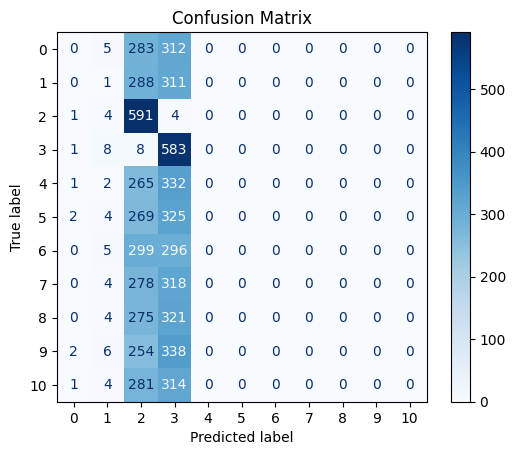

In [61]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.metrics import roc_curve, auc

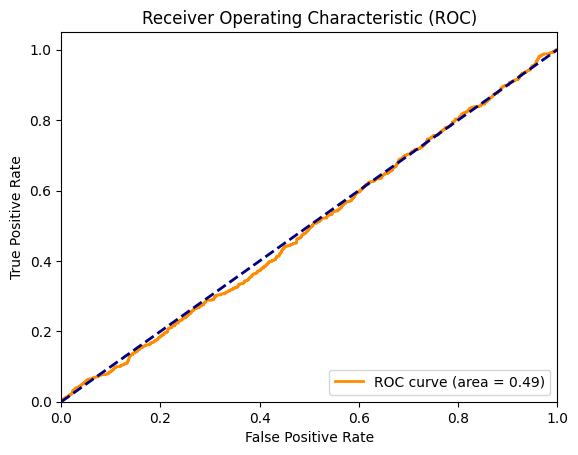

In [63]:
pred_probs = predictions.predictions
# If you have multiple classes, you need to compute the ROC AUC for each class
# For binary classification, consider only one class (usually positive class)

# Assuming binary classification with class 1 as positive class
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1], pos_label=1)  # Adjust if your model outputs probabilities for each class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()